In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html


Prediction task is to determine whether a person makes over 50K a year.

## Columns

<b>age</b>: continuous.<br>
<b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt</b>: continuous.<br>
<b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num</b>: continuous.<br>
<b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex</b>: Female, Male.<br>
<b>capital-gain</b>: continuous.<br>
<b>capital-loss</b>: continuous.<br>
<b>hours-per-week</b>: continuous.<br>
<b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>


In [61]:
adults = pd.read_csv("datasets/Adult/adult.data",sep=',',names=['age','workClass','finalWeight','educationLvl','educationNum','maritalStatus','occupation','relationship','race','sex','gain','loss','hoursW','country','y'])
adults.loc[adults['y'] == ' <=50K','y'] = 0
adults.loc[adults['y'] != 0,'y'] = 1
positiveClass = adults[adults['y'] == 1]
negativeClass = adults[adults['y'] == 0]

adults.head(10)

,age,workClass,finalWeight,educationLvl,educationNum,maritalStatus,occupation,relationship,race,sex,gain,loss,hoursW,country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [3]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [145]:
adults.describe()
positiveClass.describe()
negativeClass.describe()

,age,finalWeight,educationNum,gain,loss,hoursW,y
count,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000,24720.0
mean,36.783738,1.903409e+05,9.595065,148.752468,53.142921,38.840210,0.0
std,14.020088,1.064823e+05,2.436147,963.139307,310.755769,12.318995,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000,0.0
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000,0.0
75%,46.000000,2.390230e+05,10.000000,0.000000,0.000000,40.000000,0.0
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000,0.0


In [143]:
inspectCategoricalVariables(['workClass','educationLvl','country'],positiveClass)

{'workClass': workClass
  ?                    191
  Federal-gov          371
  Local-gov            617
  Private             4963
  Self-emp-inc         622
  Self-emp-not-inc     724
  State-gov            353
 dtype: int64, 'educationLvl': educationLvl
  10th              62
  11th              60
  12th              33
  1st-4th            6
  5th-6th           16
  7th-8th           40
  9th               27
  Assoc-acdm       265
  Assoc-voc        361
  Bachelors       2221
  Doctorate        306
  HS-grad         1675
  Masters          959
  Prof-school      423
  Some-college    1387
 dtype: int64, 'country': country
  ?                      146
  Cambodia                 7
  Canada                  39
  China                   20
  Columbia                 2
  Cuba                    25
  Dominican-Republic       2
  Ecuador                  4
  El-Salvador              9
  England                 30
  France                  12
  Germany                 44
  Greece        

In [142]:

inspectCategoricalVariables(['workClass','educationLvl','country'],negativeClass)

{'workClass': workClass
  ?                    1645
  Federal-gov           589
  Local-gov            1476
  Never-worked            7
  Private             17733
  Self-emp-inc          494
  Self-emp-not-inc     1817
  State-gov             945
  Without-pay            14
 dtype: int64, 'educationLvl': educationLvl
  10th             871
  11th            1115
  12th             400
  1st-4th          162
  5th-6th          317
  7th-8th          606
  9th              487
  Assoc-acdm       802
  Assoc-voc       1021
  Bachelors       3134
  Doctorate        107
  HS-grad         8826
  Masters          764
  Preschool         51
  Prof-school      153
  Some-college    5904
 dtype: int64, 'country': country
  ?                               437
  Cambodia                         12
  Canada                           82
  China                            55
  Columbia                         57
  Cuba                             70
  Dominican-Republic               68
  Ecuador   

In [141]:
def inspectCategoricalVariables(fieldNames,data, percentage = None):
    if(type(fieldNames) == list):
        result = {};
        for fieldName in fieldNames:
            result[fieldName] = inspectCategoricalVariables(fieldName,data)
        return result
    else:
        return data.groupby(fieldNames).size() / len(data) if percentage is not None else data.groupby(fieldNames).size()

In [26]:
adults.columns
adults['y'] = 0
adults.loc[adults[' <=50K'] == ' <=50K','y'] = 1
np.bincount(adults['y'])

array([ 7841, 24719], dtype=int64)

In [138]:
np.bincount(positiveClass["country"])

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

(array([  65.,  130.,  158., 3632., 1076., 1728.,  776.,  156.,   79.,
          41.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

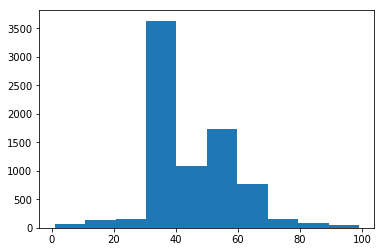

In [72]:
plt.hist(positiveClass['hoursW'],bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BE48077B8>,
      dtype=object)

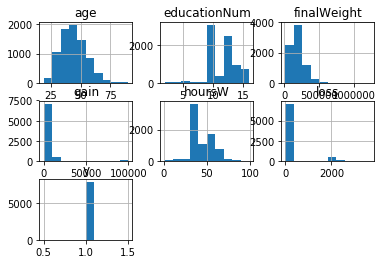

In [74]:

positiveClass.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BE190FCF8>,
      dtype=object)

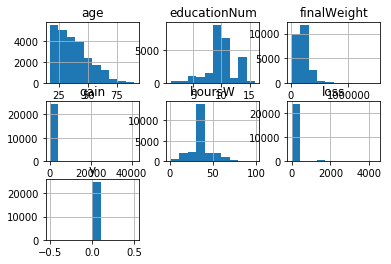

In [76]:

negativeClass.hist(bins=10)

In [133]:
def PlotCategoricalVariables(data):
    
    nPlots = len(data.columns)
    fig = plt.figure(nPlots, (14, 20))
    
    for i,cat in enumerate(data.columns):        
        ax1 = plt.subplot(nPlots,1,i+1)
        sns.countplot(data[cat], order=data[cat].value_counts().index)
        ax1.set_xlabel(None)
        ax1.set_title(f'Distribution of {cat} when 0')
        plt.tight_layout()
        
#         ax2 = plt.subplot(nPlots,2,i+1)
#         sns.countplot(classTwo[cat], order=classTwo[cat].value_counts().index, ax=ax2)
#         ax2.set_xlabel(None)
#         ax2.set_title(f'Distribution of {cat} when 1')
#         plt.tight_layout()

    plt.show()

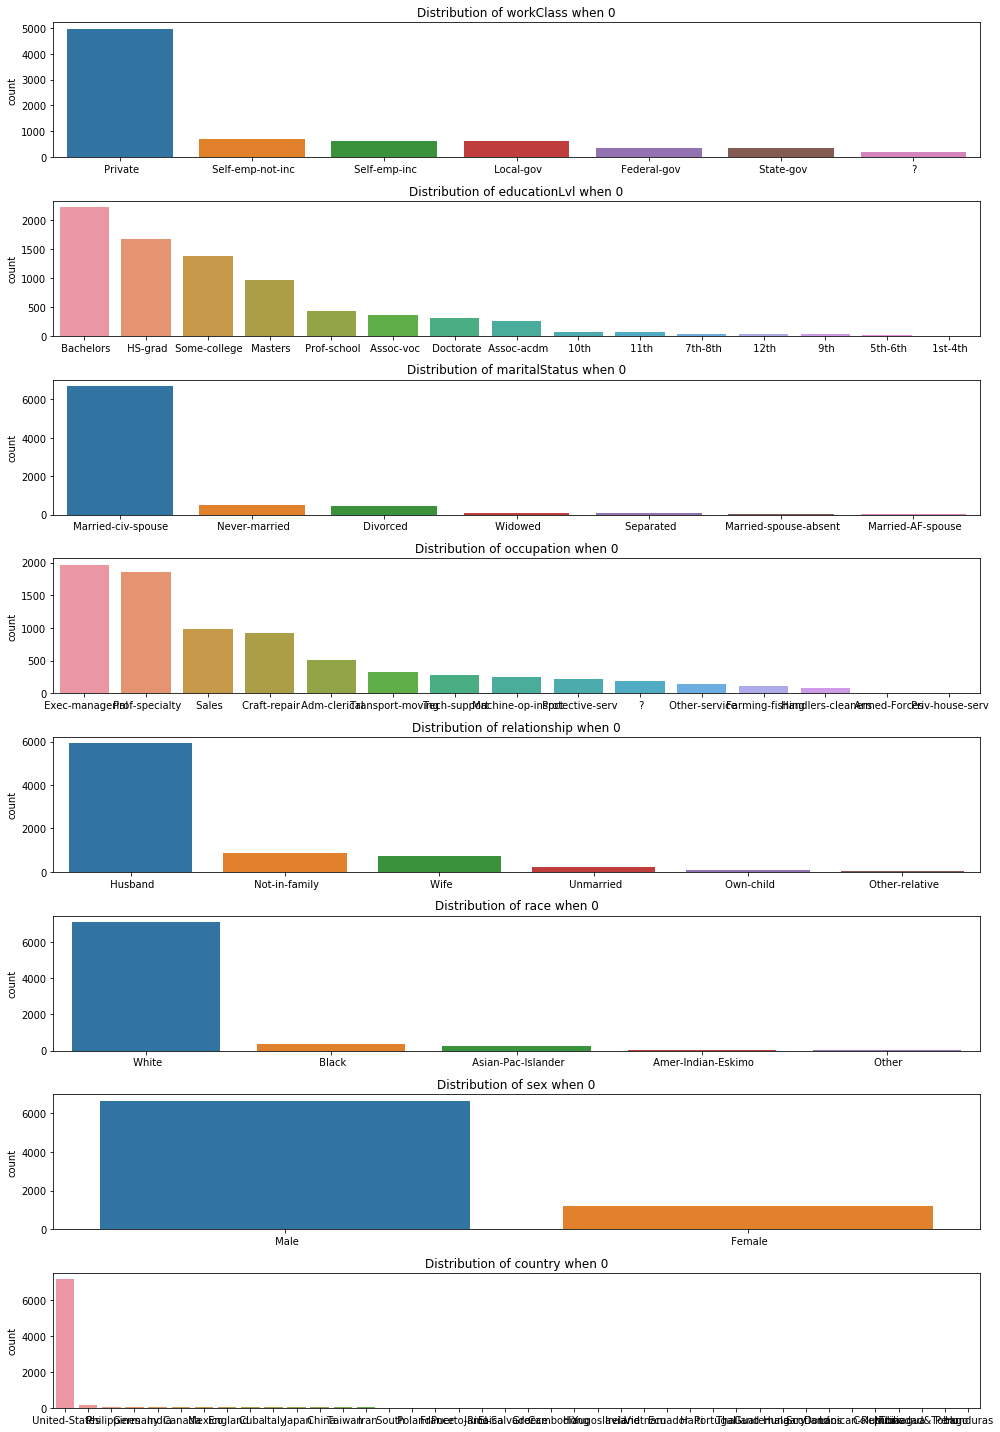

,workClass,educationLvl,maritalStatus,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [137]:
cat = adults.select_dtypes(include=['object'])
classOne = cat[adults['y'] == 1]
classTwo = cat[adults['y'] == 0]
PlotCategoricalVariables(classOne)
cat

In [161]:
adults["workClass"].unique()
print("\nAny strange value\n", adults.isin([None,' ',' ?',np.nan]).any())
adults[adults.isin([None,' ',' ?',np.nan]).any(axis=1)].shape
adults.shape


Any strange value
 age              False
workClass         True
finalWeight      False
educationLvl     False
educationNum     False
maritalStatus    False
occupation        True
relationship     False
race             False
sex              False
gain             False
loss             False
hoursW           False
country           True
y                False
dtype: bool


(32561, 15)